In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import os
from random import shuffle
import glob
from pathlib import Path

import matplotlib.pyplot as plt
import math
import datetime


In [3]:
lrResultsCsv = pd.read_csv("results/01-results-LR.csv", sep=",", header="infer", delim_whitespace=False)
lResultsCsv = pd.read_csv("results/02-results-L.csv", sep=",", header="infer", delim_whitespace=False)
rResultsCsv = pd.read_csv("results/03-results-R.csv", sep=",", header="infer", delim_whitespace=False)

In [4]:
sensorTypeValues = lrResultsCsv["Sensor Type"].values

xStates = {"LR" :lrResultsCsv["x"].values[:-1], "L" :lResultsCsv["x"].values[:-1], "R": rResultsCsv["x"].values[:-1]}
yStates = {"LR" :lrResultsCsv["y"].values[:-1], "L" :lResultsCsv["y"].values[:-1], "R": rResultsCsv["y"].values[:-1]}
xDotStates = {"LR" :lrResultsCsv["x dot"].values[:-1], "L" :lResultsCsv["x dot"].values[:-1], "R": rResultsCsv["x dot"].values[:-1]}
yDotStates = {"LR" :lrResultsCsv["y dot"].values[:-1], "L" :lResultsCsv["y dot"].values[:-1], "R": rResultsCsv["y dot"].values[:-1]}

phiStates =  {"LR": lrResultsCsv["phi"].values[1:-1:2].astype(np.float), 
              "R": rResultsCsv["phi"].values[1:-1:2].astype(np.float)}

xRmses = {"LR" :lrResultsCsv["rmse x"].values[:-1], "L" :lResultsCsv["rmse x"].values[:-1], "R": rResultsCsv["rmse x"].values[:-1]}
yRmses = {"LR" :lrResultsCsv["rmse y"].values[:-1], "L" :lResultsCsv["rmse y"].values[:-1], "R": rResultsCsv["rmse y"].values[:-1]}
xDotRmses = {"LR" :lrResultsCsv["rmse x dot"].values[:-1], "L" :lResultsCsv["rmse x dot"].values[:-1], "R": rResultsCsv["rmse x dot"].values[:-1]}
yDotRmses = {"LR" :lrResultsCsv["rmse y dot"].values[:-1], "L" :lResultsCsv["rmse y dot"].values[:-1], "R": rResultsCsv["rmse y dot"].values[:-1]}

xGroundTruths = {"LR" :lrResultsCsv["gt x"].values[:-1], "L" :lResultsCsv["gt x"].values[:-1], "R": rResultsCsv["gt x"].values[:-1]}
yGroundTruths = {"LR" :lrResultsCsv["gt y"].values[:-1], "L" :lResultsCsv["gt y"].values[:-1], "R": rResultsCsv["gt y"].values[:-1]}
xDotGroundTruths = {"LR" :lrResultsCsv["gt x dot"].values[:-1], "L" :lResultsCsv["gt x dot"].values[:-1], "R": rResultsCsv["gt x dot"].values[:-1]}
yDotGroundTruths = {"LR" :lrResultsCsv["gt y dot"].values[:-1], "L" :lResultsCsv["gt y dot"].values[:-1], "R": rResultsCsv["gt y dot"].values[:-1]}


In [38]:
xyRmses = {"LR": np.sqrt(np.square(xRmses["LR"]) + np.square(yRmses["LR"])), 
          "L": np.sqrt(np.square(xRmses["L"]) + np.square(yRmses["L"])),
          "R": np.sqrt(np.square(xRmses["R"]) + np.square(yRmses["R"])),}

xyDotRmses = {"LR": np.sqrt(np.square(xDotRmses["LR"]) + np.square(yDotRmses["LR"])), 
              "L": np.sqrt(np.square(xDotRmses["L"]) + np.square(yDotRmses["L"])),
              "R": np.sqrt(np.square(xDotRmses["R"]) + np.square(yDotRmses["R"])),}

In [5]:
calculatedPhiStates = {"LR": np.arctan2(yStates["LR"][1::2], xStates["LR"][1::2]), 
                       "L": np.arctan2(yStates["L"], xStates["L"]), 
                       "R": np.arctan2(yStates["R"], xStates["R"])}


In [6]:
# phiStates["R"].size - calculatedPhiStates["R"][1::2].size

In [139]:
from scipy.stats import linregress

corr = {"LR": None, "L": None, "R": None}

# np.cov(phiStates["LR"], calculatedPhiStates["LR"])

corr["LR"] = np.cov(phiStates["LR"], calculatedPhiStates["LR"]) / (np.std(phiStates["LR"]) * np.std(calculatedPhiStates["LR"]))
# corr["L"] = np.cov(phiStates["L"], calculatedPhiStates["L"]) / (np.std(phiStates["L"]) * np.std(calculatedPhiStates["L"]))
corr["R"] = np.cov(phiStates["R"], calculatedPhiStates["R"][1::2]) / (np.std(phiStates["R"]) * np.std(calculatedPhiStates["R"][1::2]))

# linregress(phiStates, calculatedPhiStates[1::2])

In [140]:
corr["LR"]

array([[1.00477007, 1.00449214],
       [1.00449214, 1.00440427]])

In [141]:
corr["R"]

array([[1.00408156, 1.00440641],
       [1.00440641, 1.00496841]])

In [27]:
np.linspace(start=0, stop=xRmses["LR"].size, num=xRmses["LR"].size)

438

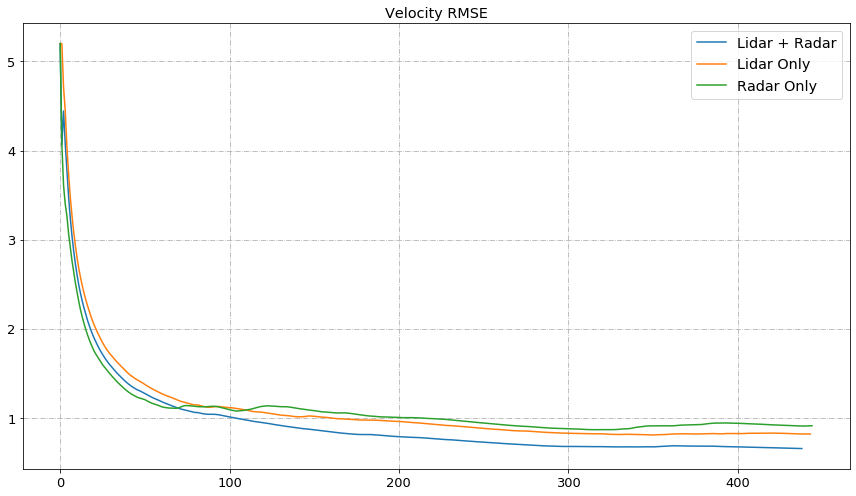

In [39]:
title = "Velocity RMSE"

titles = ["State x", "State y"]

legendTitles = ["Lidar + Radar", "Lidar Only", "Radar Only","Ground Truth"]

# dataPointCount = len(trl6Calculator.simulatedNavPerformanceResults.scanningMileageScores)
# xAxisData = np.linspace(start=0, stop=dataPointCount, num=int(dataPointCount))

index = 0

setAxesLims = False
xLims = [0.0, 10.0]
yLims = [-0.0, 1.5]

#xAxisDataList = [xStates["LR"], xStates["L"], xStates["R"], xGroundTruths["LR"]]

#xAxisDataList = [np.linspace(start=0, stop=xyRmses["LR"].size, num=xyRmses["LR"].size) , 
#                 np.linspace(start=0, stop=xyRmses["L"].size, num=xyRmses["L"].size), 
#                 np.linspace(start=0, stop=xyRmses["R"].size, num=xyRmses["R"].size)]

xDotAxisDataList = [np.linspace(start=0, stop=xyDotRmses["LR"].size, num=xyDotRmses["LR"].size) , 
                    np.linspace(start=0, stop=xyDotRmses["L"].size, num=xyDotRmses["L"].size), 
                    np.linspace(start=0, stop=xyDotRmses["R"].size, num=xyDotRmses["R"].size)]

#yAxisDataList = [yStates["LR"], yStates["L"], yStates["R"], yGroundTruths["LR"]]
#yAxisDataList = [xyRmses["LR"], xyRmses["L"], xyRmses["R"]]
yAxisDataList = [xyDotRmses["LR"], xyDotRmses["L"], xyDotRmses["R"]]

fig, axis = plt.subplots()

for xAxisData, yAxisData in zip(xAxisDataList, yAxisDataList):
    lineStyle = "dashed" if (index == 3) else "solid"
    
    axis.plot(xAxisData, yAxisData, label=legendTitles[index], linestyle=lineStyle)
    axis.legend(loc=0, fontsize="x-large")

    if (setAxesLims):
        axis.set_xlim(xLims[0], xLims[1])
        axis.set_ylim(yLims[0], yLims[1])
    
    index += 1
    
axis.set_title(title, fontsize="x-large")

# axis.xaxis.set_major_locator(MaxNLocator(integer=True))

gridlines = axis.get_xgridlines() + axis.get_ygridlines()
ticklabels = axis.get_xticklabels() + axis.get_yticklabels()

for line in gridlines:
    line.set_linestyle('-.')

for label in ticklabels:
    label.set_color("black")
    label.set_fontsize(13)

axis.grid(b=True, which="both", alpha=1.0)

scaleFactor = 2.5
fig.set_figheight(int(3*scaleFactor))
fig.set_figwidth(int(5*scaleFactor))
fig.tight_layout()

plt.savefig(fname="Images/velocity-rmses-01.jpg")

plt.show()
